# Exploratory Data Analysis - Retail

# Author : Lawpan Melvin Toe

In [24]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
import statsmodels.api as sm

In [5]:
#Reading the dataset
store_df = pd.read_csv("SampleSuperstore.csv")
store_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Analysing the data

In [7]:
#shape of the data
store_df.shape

(9994, 13)

In [8]:
#data information 
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
# describe the data
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
#checking missing values

store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Univariate Analysis

*In Univariate analysis, plotting the right charts can help us better understand the data, which is why data visualization is so important. Matplotlib and Seaborn libraries are used in this post to visualize our data.*

Text(0.5, 1.0, 'Mean Profit for Each State')

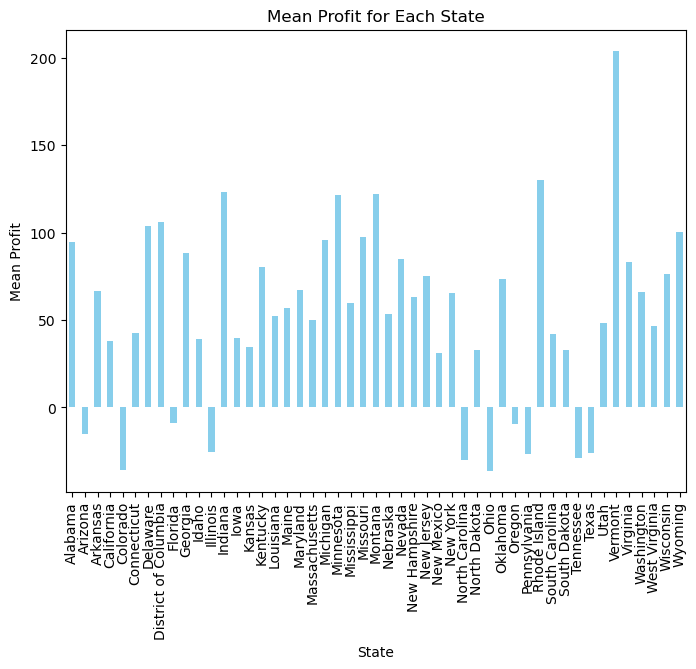

In [21]:
# Group by 'State' and calculate the mean profit for each state
state_profits = store_df.groupby("State")["Profit"].mean()

# Create a bar plot to visualize the mean profit for each state
state_profits.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.xlabel("State")
plt.ylabel("Mean Profit")
plt.title("Mean Profit for Each State")

## Multiple Regression to see what variables are good predictors of profits 


In [30]:
#dependent variable
Profit = store_df["Profit"]
# Create separate models for each independent variable
variables = ["Discount", "Sales", "Quantity"]

results_summary = []

for variable in variables:
    # Add a constant for the intercept
    x_with_cnst = sm.add_constant(store_df[variable])

    # Fit the OLS regression model
    model = sm.OLS(Profit, x_with_cnst)
    results = model.fit()

    # Store the summary for each model
    results_summary.append({
        'Variable': variable,
        'Adjusted R-squared': results.rsquared_adj,
        'Summary': results.summary().as_text()
    })

# Display adjusted R-squared and summary for each model
for result in results_summary:
    print(f"Model with {result['Variable']} as independent variable:")
    print("Adjusted R-squared:", result['Adjusted R-squared'])
    print(result['Summary'])
    print("\n")

Model with Discount as independent variable:
Adjusted R-squared: 0.04807948477191348
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     505.7
Date:                Mon, 06 May 2024   Prob (F-statistic):          2.70e-109
Time:                        12:06:17   Log-Likelihood:                -68465.
No. Observations:                9994   AIC:                         1.369e+05
Df Residuals:                    9992   BIC:                         1.369e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

### While Sales has the highest adjusted R-squared and significant impact, concluding that it has the "highest impact" should be made with caution. It's more accurate to say that Sales has a strong and statistically significant correlation with Profit, and it explains the most variability in the current models. 

## More analysis

In [32]:
# figuring out the top 100 areas with the lowest profits
low_prof = store_df.nsmallest(n=1000, columns=['Profit'], keep='all')
low_prof

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,Standard Class,Home Office,United States,Dallas,Texas,75081,Central,Office Supplies,Storage,77.952,3,0.2,-15.5904
2784,Standard Class,Corporate,United States,Troy,Ohio,45373,East,Technology,Phones,23.976,4,0.4,-15.5844
3235,Same Day,Consumer,United States,Fairfield,Connecticut,6824,East,Furniture,Tables,181.797,1,0.3,-15.5826
6795,Standard Class,Corporate,United States,Chicago,Illinois,60610,Central,Furniture,Furnishings,34.504,2,0.6,-15.5268


In [46]:
# figuring out the average Segment, City,State,Region,Category and Sub-Category in the lowest 1000 profits

print(low_prof["City"].value_counts())
print()
print(low_prof["State"].value_counts())
print()
print(low_prof["Segment"].value_counts())
print()
print(low_prof["Region"].value_counts())
print()
print(low_prof["Category"].value_counts())
print()
print(low_prof["Sub-Category"].value_counts())

City
Philadelphia     136
Houston           99
Chicago           74
Dallas            38
New York City     32
                ... 
Mansfield          1
Santa Ana          1
Mesquite           1
Carol Stream       1
Coral Springs      1
Name: count, Length: 180, dtype: int64

State
Texas             256
Pennsylvania      151
Illinois          133
Ohio              112
California         56
Florida            55
Arizona            44
New York           38
North Carolina     37
Colorado           35
Tennessee          32
Oregon             23
Washington         10
Massachusetts       5
Rhode Island        3
Delaware            2
Maryland            2
New Jersey          2
New Hampshire       1
West Virginia       1
Nevada              1
Connecticut         1
Name: count, dtype: int64

Segment
Consumer       538
Corporate      302
Home Office    160
Name: count, dtype: int64

Region
Central    389
East       318
West       169
South      124
Name: count, dtype: int64

Category
Furniture   

# Investigating Sales

In [48]:
low_sales = store_df.nsmallest(n=1000, columns=['Sales'], keep='all')
low_sales

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4101,Standard Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100
9292,Same Day,Corporate,United States,Waco,Texas,76706,Central,Office Supplies,Binders,0.556,1,0.8,-0.9452
8658,Standard Class,Corporate,United States,Chicago,Illinois,60623,Central,Office Supplies,Binders,0.836,1,0.8,-1.3376
4711,Same Day,Consumer,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Binders,0.852,1,0.7,-0.5964
2106,Same Day,Corporate,United States,Mesquite,Texas,75150,Central,Office Supplies,Binders,0.876,1,0.8,-1.4016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6798,Same Day,Consumer,United States,Houston,Texas,77041,Central,Furniture,Furnishings,7.880,5,0.6,-3.9400
8330,Standard Class,Consumer,United States,New York City,New York,10024,East,Technology,Accessories,7.880,4,0.0,2.5216
3578,Standard Class,Consumer,United States,Jackson,Mississippi,39212,South,Office Supplies,Storage,7.890,1,0.0,0.3156
7374,Second Class,Consumer,United States,Long Beach,California,90805,West,Office Supplies,Fasteners,7.890,1,0.0,3.5505


Text(0.5, 1.0, 'Mean Profit for Each State')

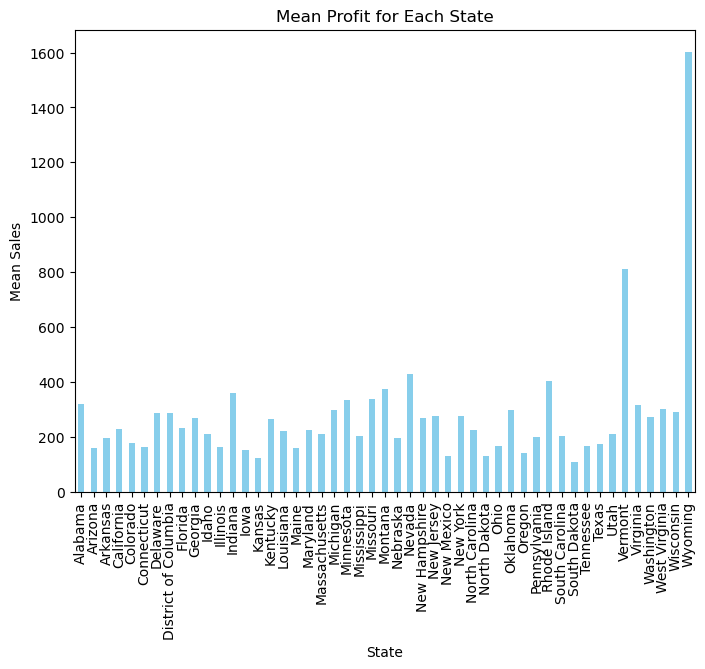

In [49]:
state_profits = store_df.groupby("State")["Sales"].mean()

# Create a bar plot to visualize the mean profit for each state
state_profits.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.xlabel("State")
plt.ylabel("Mean Sales")
plt.title("Mean Profit for Each State")